# Insurance Claim Frequency Prediction

Dataset Source :- Statso.io

Dataset Link :- https://statso.io/wp-content/uploads/2024/04/Insurance-claims-data.zip

## About Dataset

### Insurance Policy Features

- **policy_id**: Unique identifier for the insurance policy.
- **subscription_length**: The duration for which the insurance policy is active.
- **customer_age**: Age of the insurance policyholder, which can influence the likelihood of claims.
- **vehicle_age**: Age of the vehicle insured, which may affect the probability of claims due to factors like wear and tear.
- **model**: The model of the vehicle, which could impact the claim frequency due to model-specific characteristics.
- **fuel_type**: Type of fuel the vehicle uses (e.g., Petrol, Diesel, CNG), which might influence the risk profile and claim likelihood.
- **max_torque**, **max_power**: Engine performance characteristics that could relate to the vehicle’s mechanical condition and claim risks.
- **engine_type**: The type of engine, which might have implications for maintenance and claim rates.
- **displacement**, **cylinder**: Specifications related to the engine size and construction, affecting the vehicle’s performance and potentially its claim history.
- **region_code**: The code representing the geographical region of the policyholder, as claim patterns can vary regionally.
- **region_density**: Population density of the policyholder’s region, which could correlate with accident and claim frequencies.
- **airbags**: The number of airbags in the vehicle, indicating safety level which can influence claim probability.
- **is_esc** (Electronic Stability Control), **is_adjustable_steering**, **is_tpms** (Tire Pressure Monitoring System): Features that enhance vehicle safety and could potentially reduce the likelihood of claims.
- **is_parking_sensors**, **is_parking_camera**: Parking aids that might affect the probability of making a claim, especially in urban areas.
- **rear_brakes_type**: Type of rear brakes, which could be related to the vehicle’s stopping capability and safety.
- **steering_type**, **turning_radius**, **length**, **width**, **gross_weight**, and various other binary indicators (Yes/No) for specific vehicle amenities and safety features, which together build a profile of the vehicle’s characteristics and its associ
 aims to predict.


### Target Variable 

- **claim_status**: Indicates whether a claim was made (1) or not (0), which is the dependent variable the model aims to predict.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")
sns.set_style("whitegrid")
import warnings as w 
w.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\Insurance claims data.csv")

In [3]:
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [4]:
# Let’s have a quick look at the column information and whether the data contains any null values or not:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [6]:
# Summary Statistics
df.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,4.852893,3850.476891,1672.233667,1385.276813,1.759950,0.063968
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,0.228061,311.457119,112.089135,212.423085,1.389576,0.244698
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,4.600000,3445.000000,1515.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000,1.000000


In [7]:
df.describe(include = "object")

,policy_id,region_code,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,...,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592
unique,58592,22,6,11,3,9,9,11,2,2,...,2,2,2,2,2,2,2,2,2,2
top,POL045360,C8,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,No,Yes,...,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,1,13654,18314,14948,20532,17796,17796,14948,40191,35526,...,41634,38077,32177,42435,42435,57383,34291,36309,42435,58229


In [8]:
df.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [9]:
df.duplicated().sum()

0

### The dataset contains 58,592 entries and 41 columns, including the target variable claim_status. It is based on the problem of insurance claim frequency prediction. Here’s a brief overview of some of the features:

- **policy_id**: Unique identifier for the insurance policy.
- **subscription_length**, **vehicle_age**, **customer_age**: Numeric attributes related to the policy, vehicle, and customer.
- **region_code**, **segment**, **model**, **fuel_type**: Categorical attributes representing the region, vehicle segment, model, and fuel type.
- **max_torque**, **max_power**, **engine_type**: Specifications of the vehicle’s engine.
- **airbags**, **is_esc** (Electronic Stability Control), **is_adjustable_steering**: Features related to the vehicle’s safety and convenience.
- **claim_status**: Target variable indicating whether a claim was made (1) or not (0).


I will perform **Exploratory Data Analysis** to visualize and understand the distributions, relationships, and patterns in the data. It will include examining the distribution of the target variable and key features. Let’s start with visualizing the distribution of the claim_status to understand the class balance:

In [10]:
df["claim_status"].value_counts()

claim_status
0    54844
1     3748
Name: count, dtype: int64

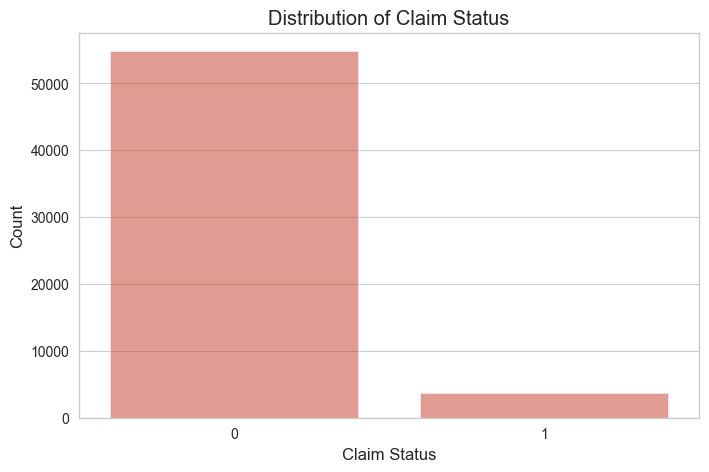

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x ='claim_status', alpha = 0.6)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

The distribution of the claim_status shows a significant imbalance between the classes, with much fewer claims (1) compared to no claims (0). 
This imbalance will be a challenge to address during the model training phase to ensure our model does not become biased toward predicting 
the majority class.

I will perform an analysis of both numerical and categorical features to understand their distributions and relationships with the claim_status. Let’s start by examining the distributions of some key numerical features such as subscription_length, vehicle_age, and customer_age:

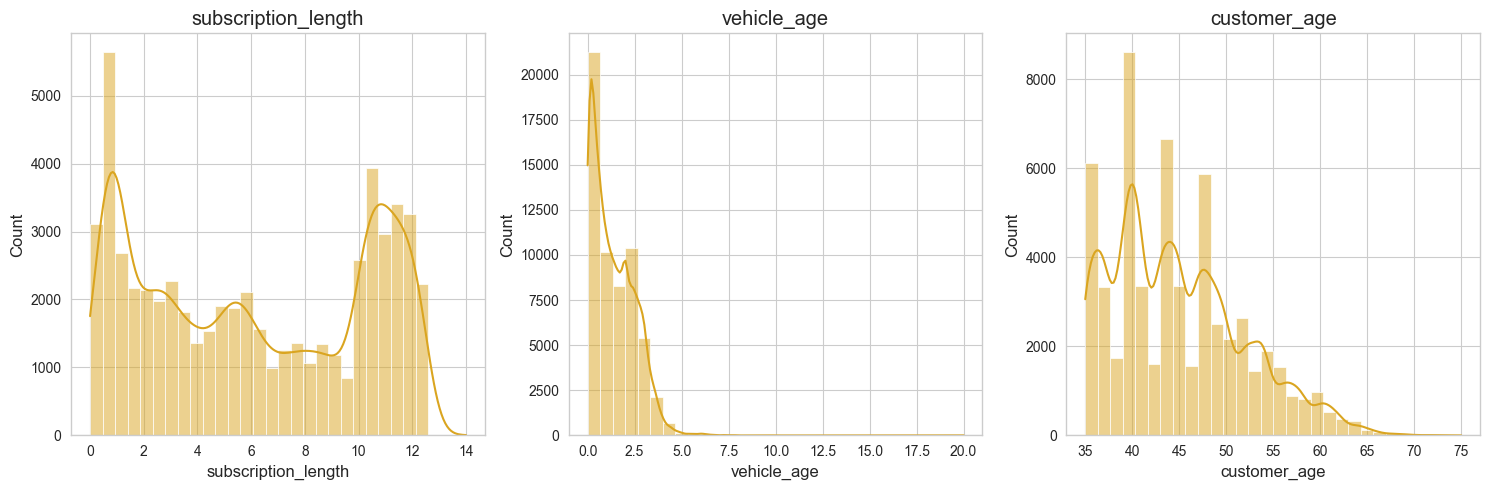

In [12]:
plt.figure( figsize = (15,5))

# selecting numerical columns for analysis
numerical_columns = ['subscription_length', 'vehicle_age', 'customer_age']

for index , i in enumerate(numerical_columns, 1):
    plt.subplot(1,3,index)
    sns.histplot( data = df , x = i, bins = 30, kde = True, color = "goldenrod")
    plt.title(i)

plt.tight_layout()
plt.show()


### Distribution Insights

- **subscription_length**: Most values are clustered around lower numbers, indicating that many policies have shorter subscription lengths.
- **vehicle_age**: This distribution is somewhat uniform but with spikes at specific ages, possibly representing common vehicle age intervals in the dataset.
- **customer_age**: This shows a fairly normal distribution, with the majority of customers falling within a middle-age range.




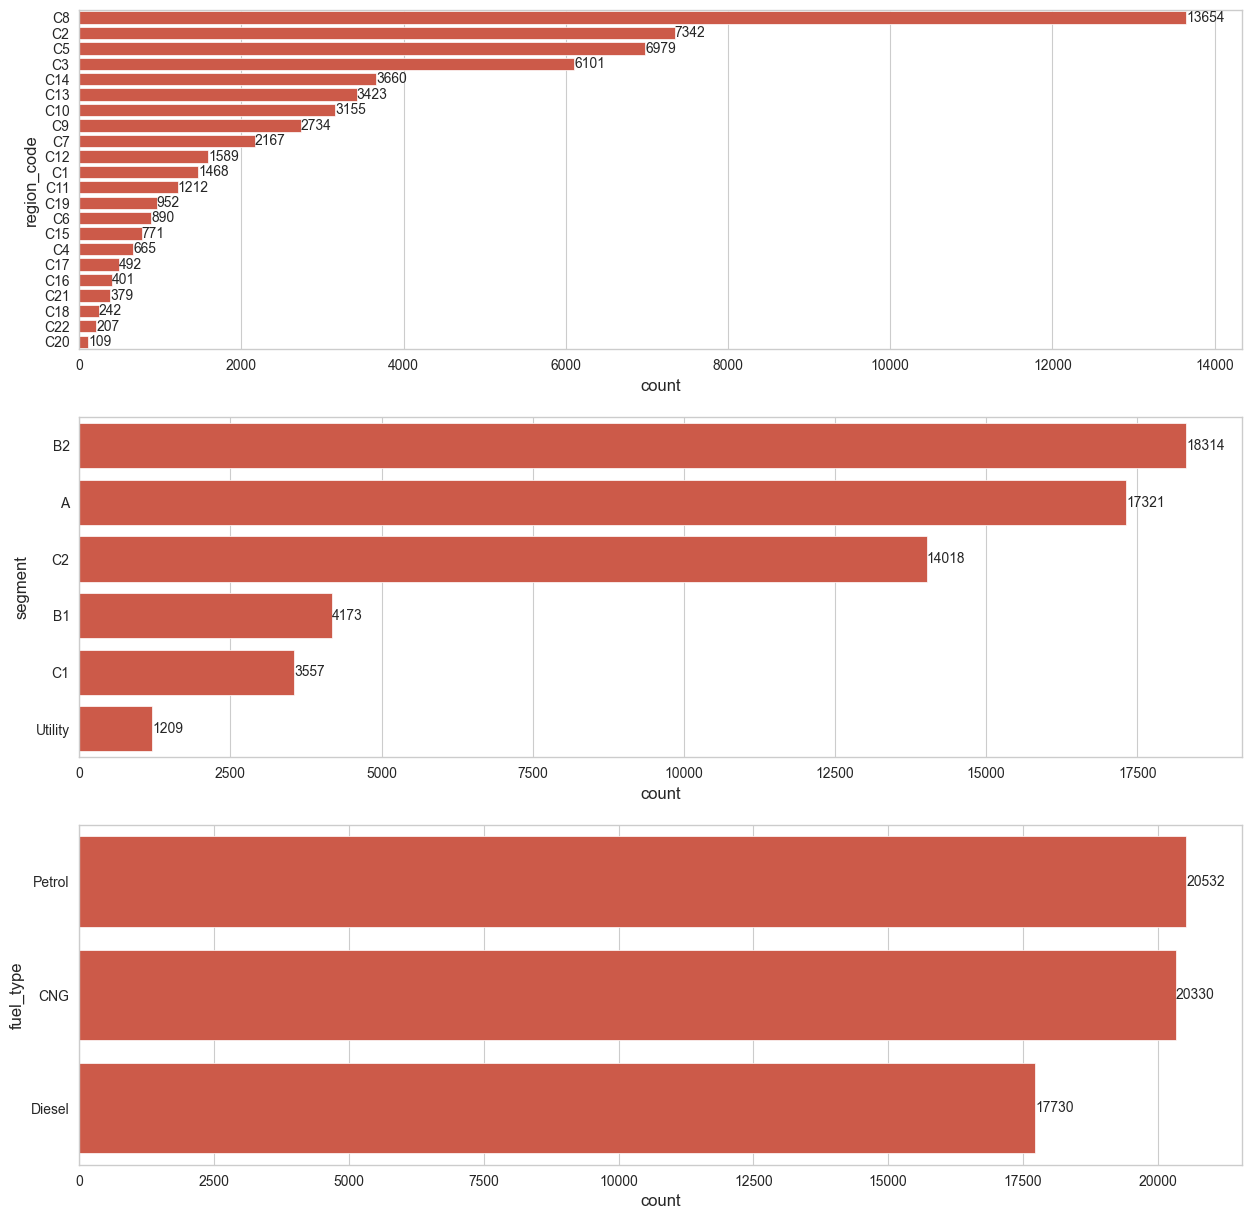

In [13]:
plt.figure( figsize = (15,15))

# selecting some relevant categorical columns for analysis
categorical_columns = ['region_code', 'segment', 'fuel_type']

for index , i in enumerate(categorical_columns, 1):
    plt.subplot(3, 1,index)
    ax = sns.countplot( data = df, y = i , orient = "h", order = df[i].value_counts().index )

    for con in ax.containers:
        ax.bar_label(con, label_type = "edge")

    
plt.show()

### Distribution Insights

1) **For ‘region_code,’** there is a wide variety of codes, each with varying counts, but a few specific codes dominate with much higher counts than others.
2) **In the ‘segment’ distribution**, there are fewer categories, with the ‘B2’ segment being the most common, followed by ‘A’ and ‘C2,’ and the ‘Utility’ segment being the least common.
3) **Lastly, ‘fuel_type’** shows three categories: ‘Petrol’ has the highest count than CNG and Diesel

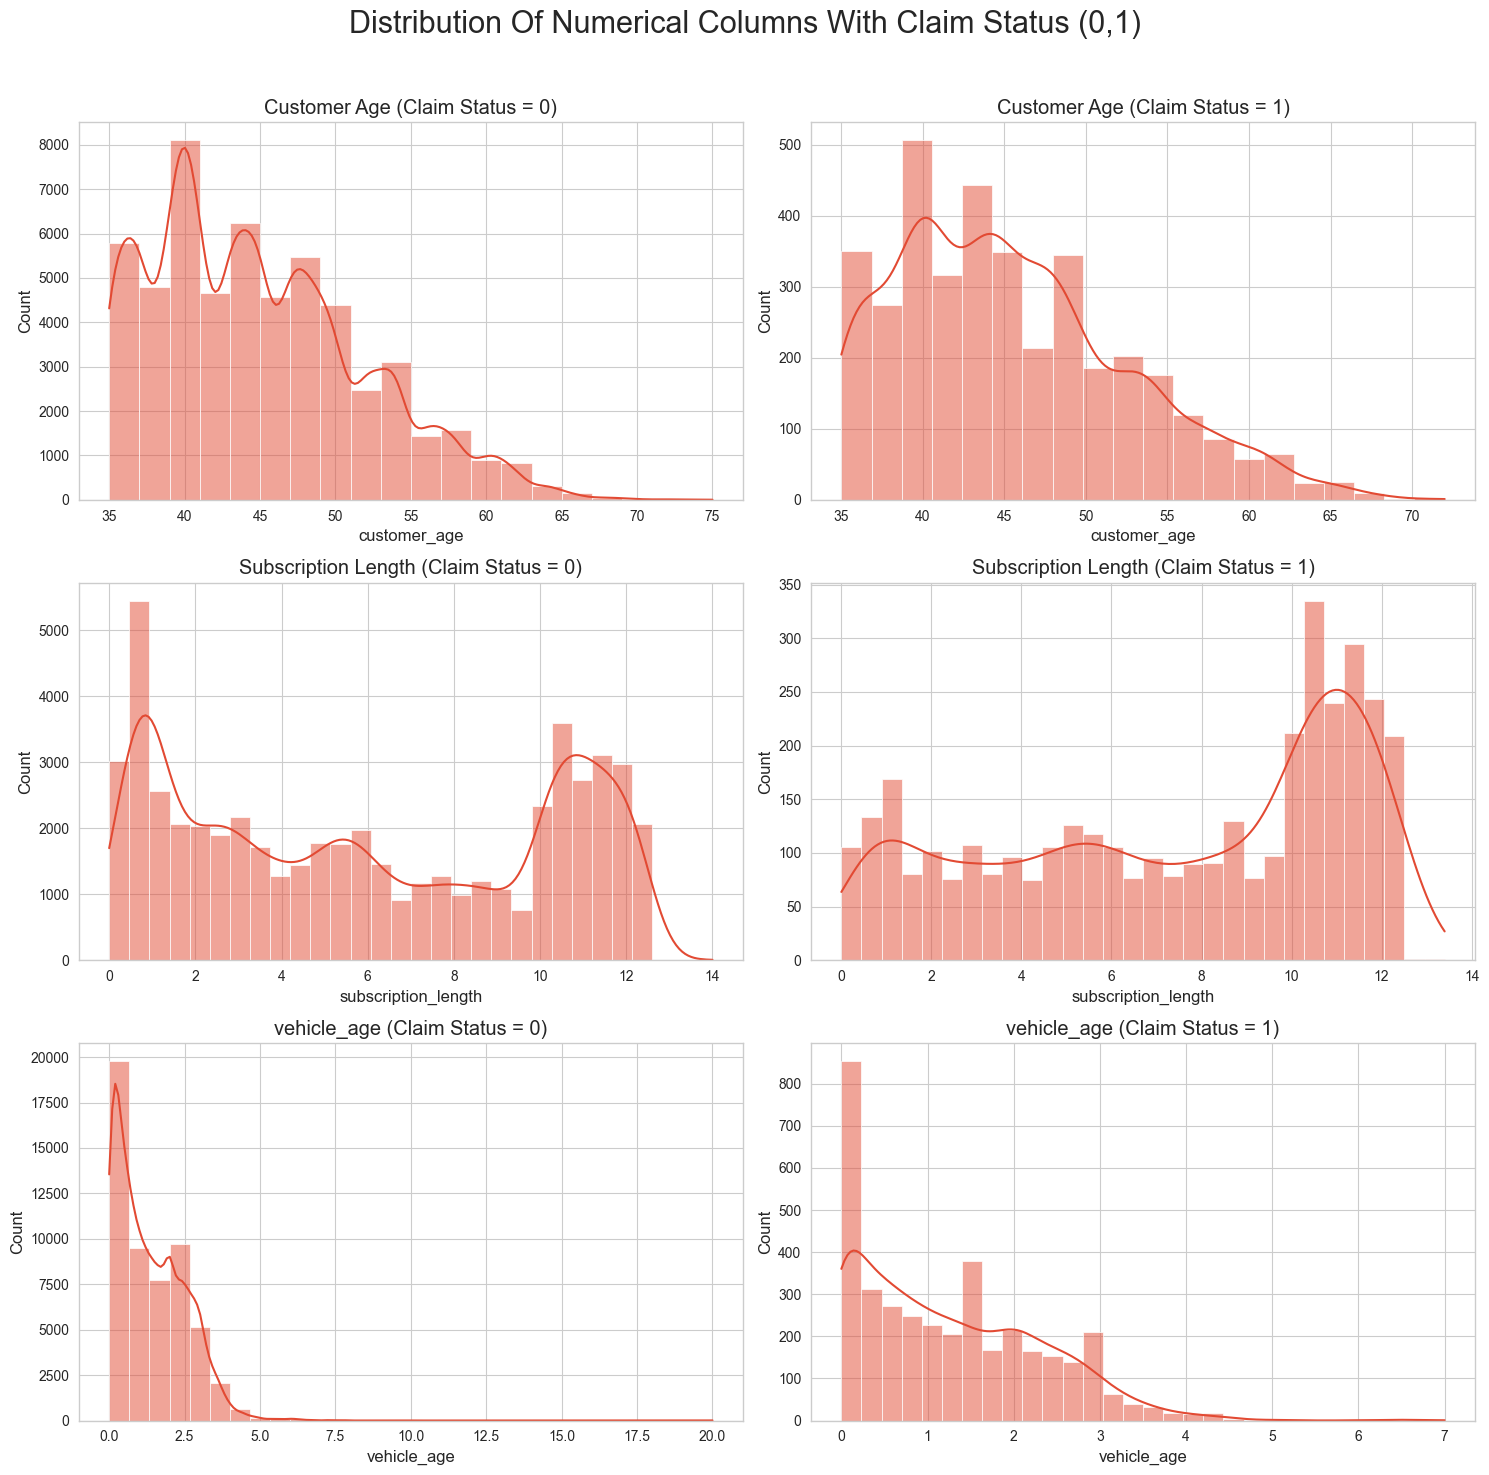

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3,2, figsize=(15,15)) 

sns.histplot( df.loc[df["claim_status"]==0, "customer_age"], bins = 20 , kde = True, ax = ax1[0])
ax1[0].set_title("Customer Age (Claim Status = 0)")

sns.histplot( df.loc[df["claim_status"]==1, "customer_age"], bins = 20 , kde = True, ax = ax1[1])
ax1[1].set_title("Customer Age (Claim Status = 1)")

sns.histplot( df.loc[df["claim_status"]==0, "subscription_length"], bins = 30 , kde = True, ax = ax2[0] )
ax2[0].set_title("Subscription Length (Claim Status = 0)")

sns.histplot( df.loc[df["claim_status"]==1, "subscription_length"], bins = 30 , kde = True, ax = ax2[1] )
ax2[1].set_title("Subscription Length (Claim Status = 1)")

sns.histplot( df.loc[df["claim_status"]==0, "vehicle_age"], bins = 30 , kde = True, ax = ax3[0])
ax3[0].set_title("vehicle_age (Claim Status = 0)")

sns.histplot( df.loc[df["claim_status"]==1, "vehicle_age"], bins = 30 , kde = True, ax = ax3[1] )
ax3[1].set_title("vehicle_age (Claim Status = 1)")

plt.suptitle("Distribution Of Numerical Columns With Claim Status (0,1)", size = 22)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

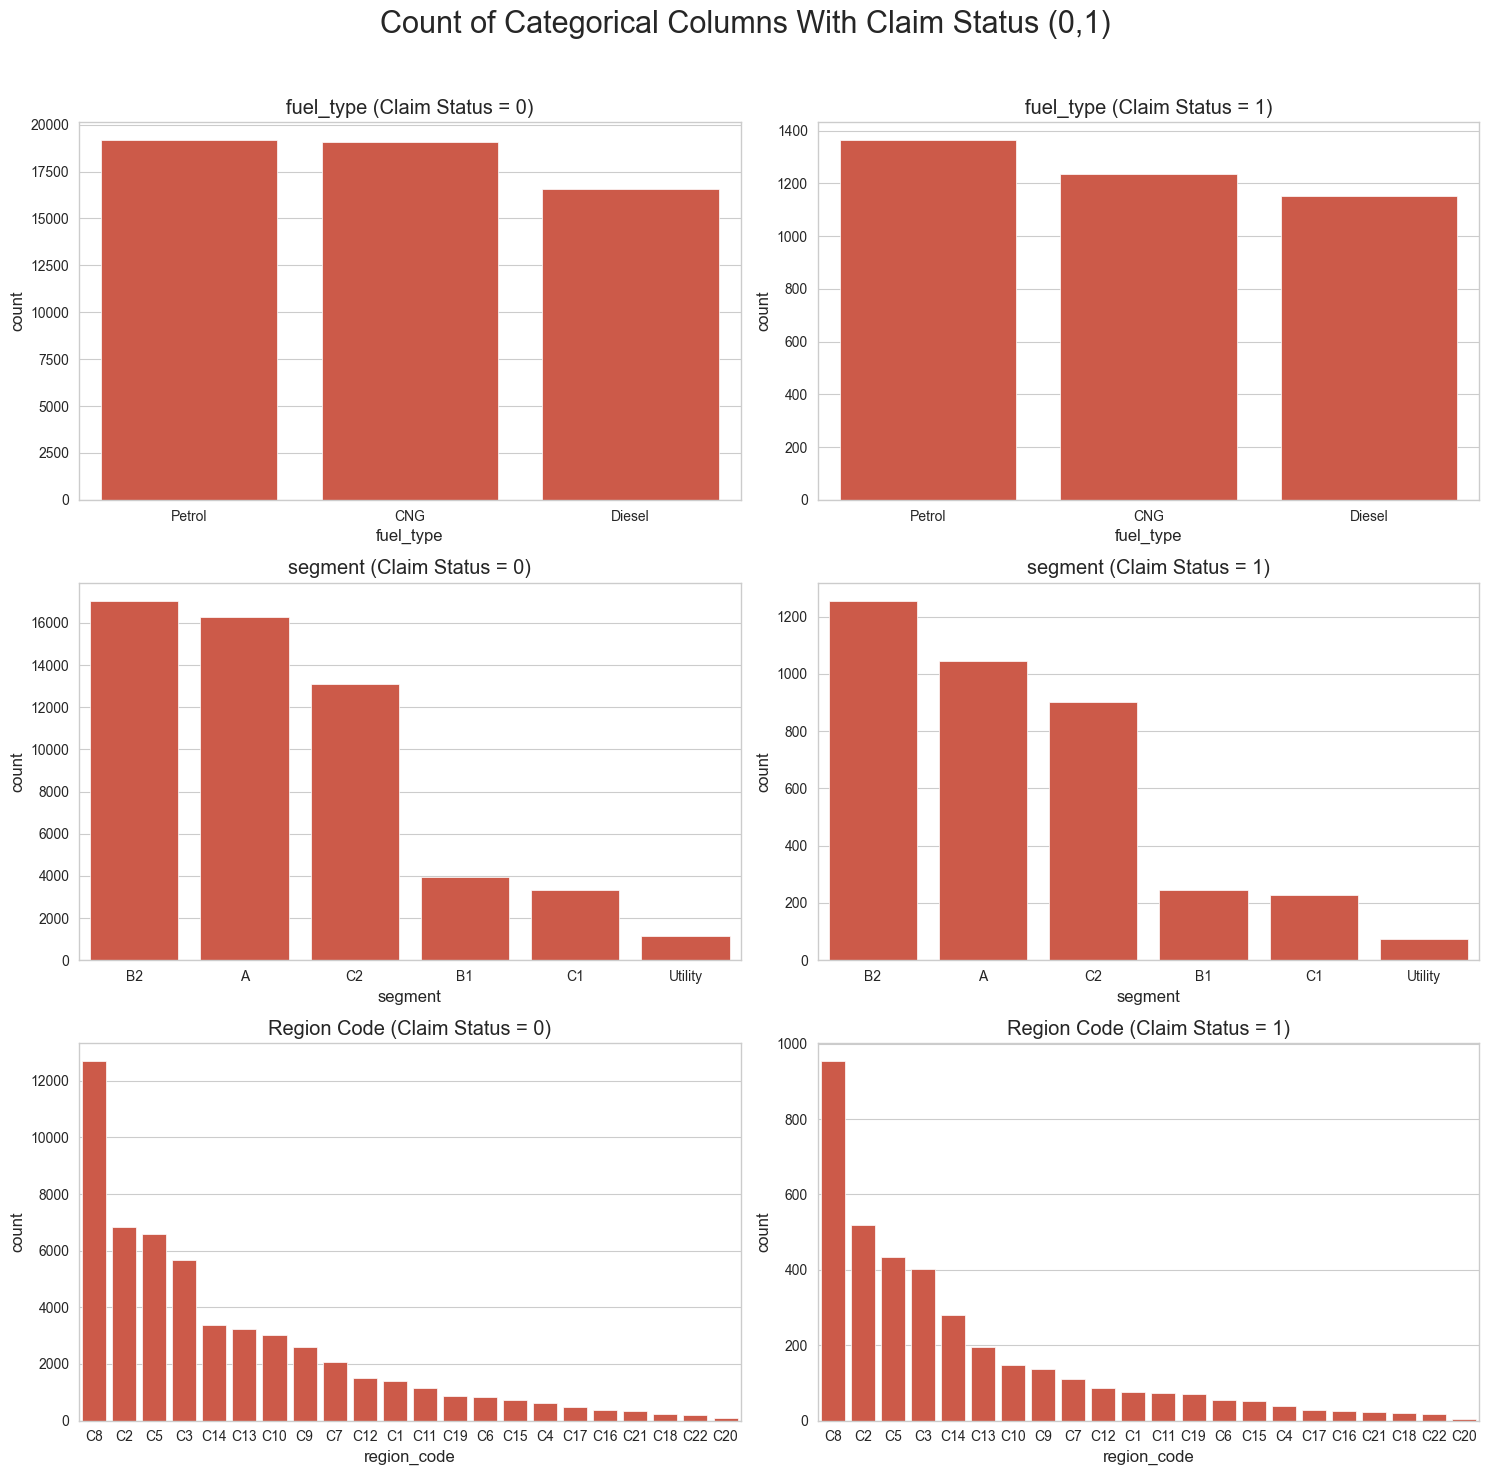

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3,2, figsize=(15,15)) 

sns.barplot( x = df["fuel_type"].value_counts().keys(), y = df.loc[df["claim_status"]==0, "fuel_type"].value_counts() , ax = ax1[0])
ax1[0].set_title("fuel_type (Claim Status = 0)")

sns.barplot( x = df["fuel_type"].value_counts().keys(), y = df.loc[df["claim_status"]==1, "fuel_type"].value_counts() , ax = ax1[1])
ax1[1].set_title("fuel_type (Claim Status = 1)")

sns.barplot( x = df["segment"].value_counts().keys(), y = df.loc[df["claim_status"]==0, "segment"].value_counts() , ax = ax2[0])
ax2[0].set_title("segment (Claim Status = 0)")

sns.barplot( x = df["segment"].value_counts().keys(), y = df.loc[df["claim_status"]==1, "segment"].value_counts() , ax = ax2[1])
ax2[1].set_title("segment (Claim Status = 1)")

sns.barplot( x = df["region_code"].value_counts().keys(), y = df.loc[df["claim_status"]==0, "region_code"].value_counts() , ax = ax3[0])
ax3[0].set_title("Region Code (Claim Status = 0)")

sns.barplot( x = df["region_code"].value_counts().keys(), y = df.loc[df["claim_status"]==1, "region_code"].value_counts() , ax = ax3[1])
ax3[1].set_title("Region Code (Claim Status = 1)")

plt.suptitle("Count of Categorical Columns With Claim Status (0,1)", size = 22)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [16]:
from scipy.stats import describe

In [17]:
for column in df.select_dtypes(include=['number']).columns:
    stats = describe(df[column])
    print(f"Statistics for column {column}:")
    print(stats)
    print("\n")

Statistics for column subscription_length:
DescribeResult(nobs=58592, minmax=(0.0, 14.0), mean=6.111687602403057, variance=17.16270922718292, skewness=0.053330513049526934, kurtosis=-1.4977219777136292)


Statistics for column vehicle_age:
DescribeResult(nobs=58592, minmax=(0.0, 20.0), mean=1.3884728290551613, variance=1.2868927744661103, skewness=1.094053216739084, kurtosis=5.30079032068298)


Statistics for column customer_age:
DescribeResult(nobs=58592, minmax=(35, 75), mean=44.823935008192244, variance=48.1026047267415, skewness=0.6597691882682012, kurtosis=-0.14202379151773448)


Statistics for column region_density:
DescribeResult(nobs=58592, minmax=(290, 73430), mean=18826.858666712178, variance=311881773.6782889, skewness=1.6741349378616295, kurtosis=2.5884734636472775)


Statistics for column airbags:
DescribeResult(nobs=58592, minmax=(1, 6), mean=3.137066493719279, variance=3.3585741664921303, skewness=0.9059231155810404, kurtosis=-1.1357968843468473)


Statistics for column 

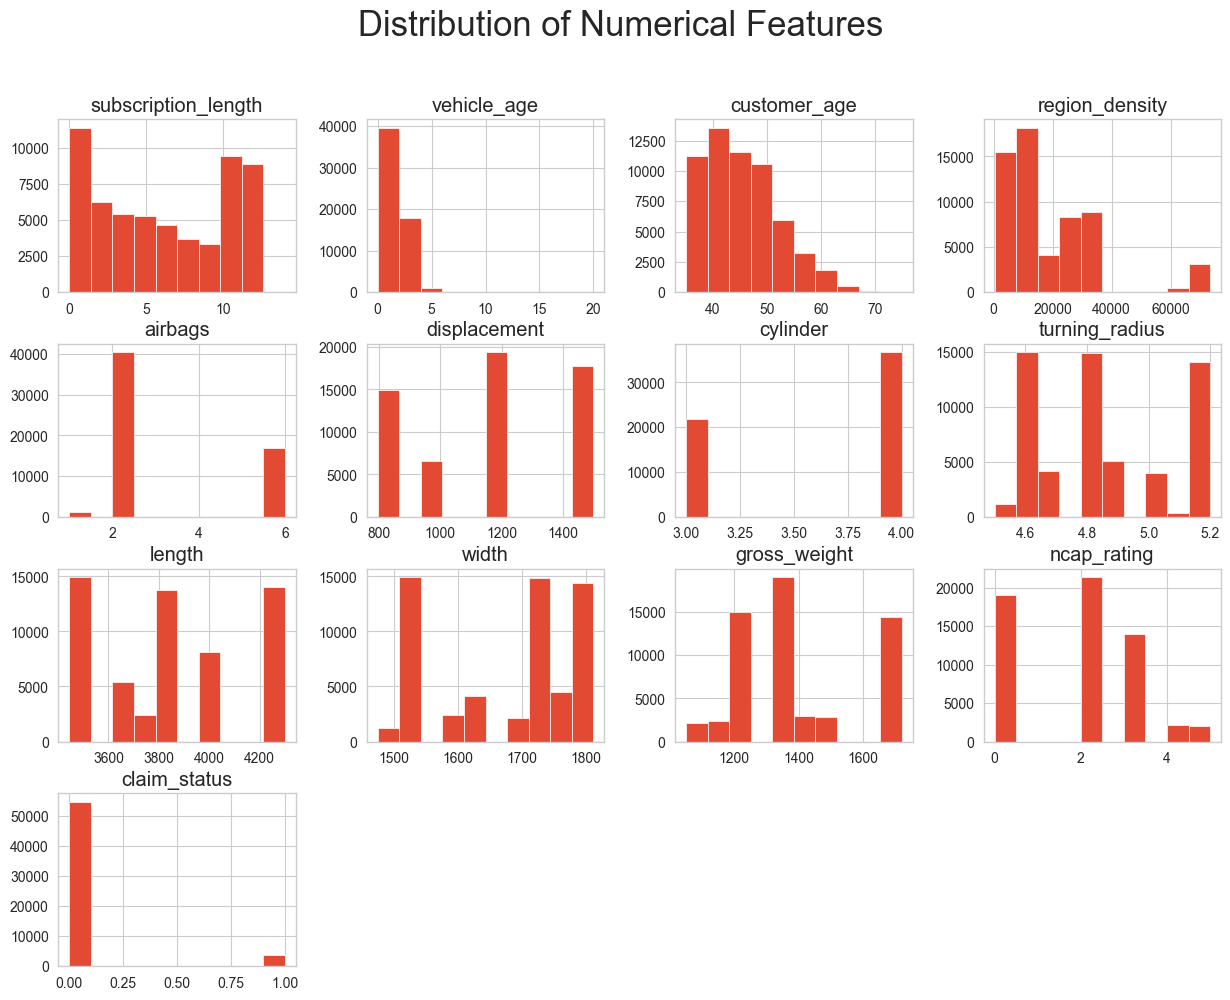

In [18]:
df.hist( figsize= (15,11))

plt.suptitle("Distribution of Numerical Features", size = 25)
plt.show()

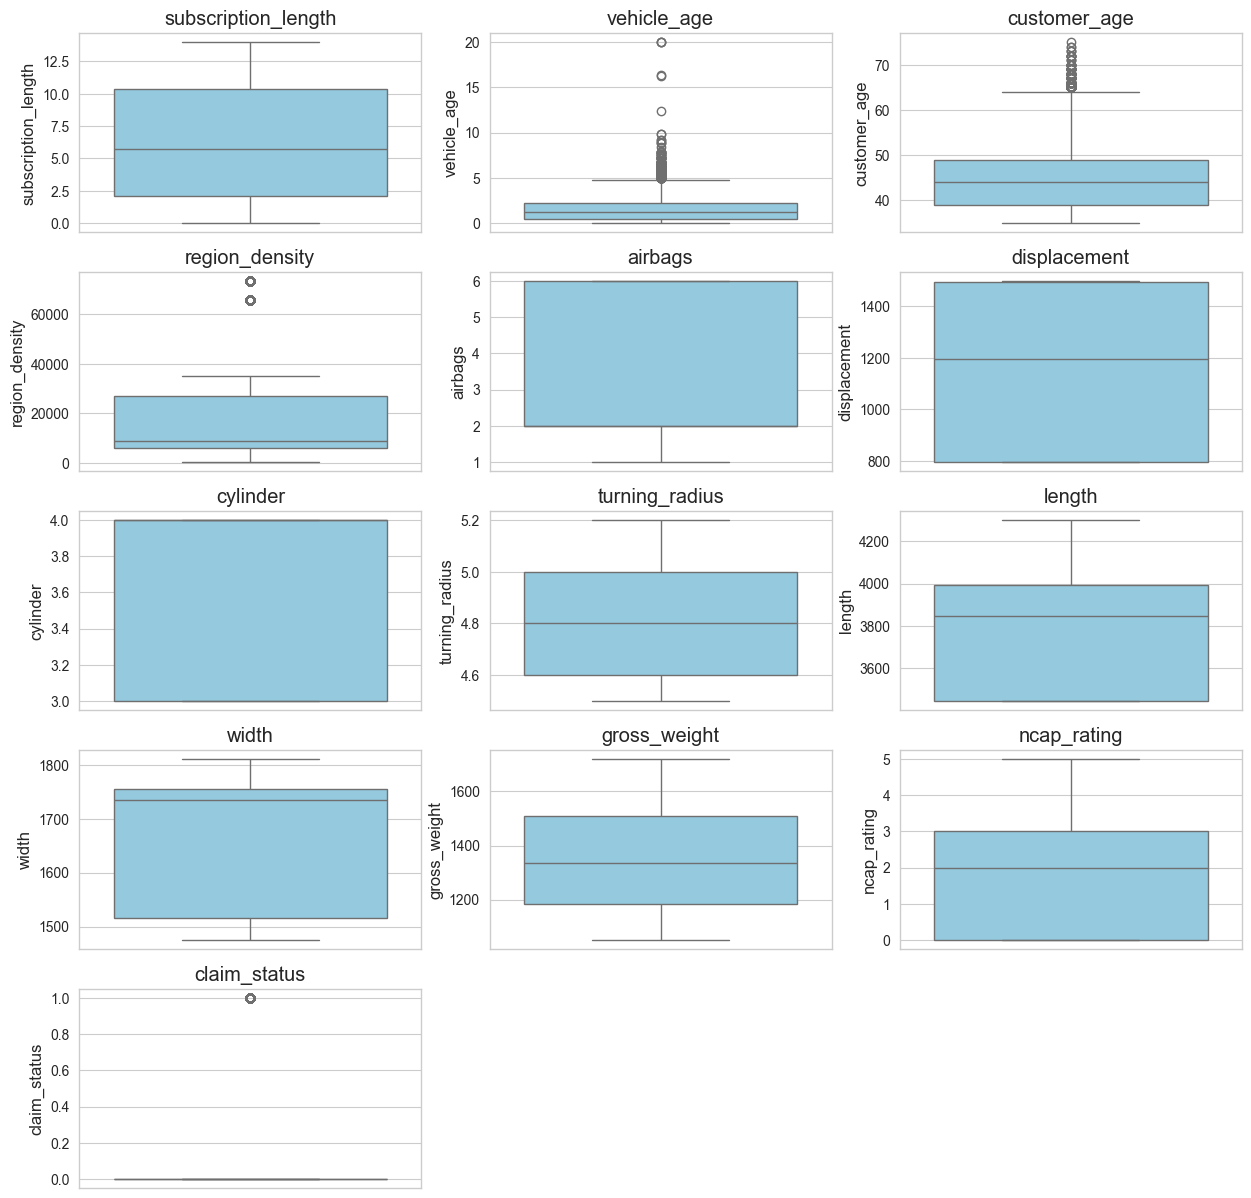

In [19]:
plt.figure(figsize = (15,15))
for i,j in enumerate(df.select_dtypes(exclude = "object").columns, 1):
    plt.subplot(5,3,i)
    sns.boxplot(df[j], color = "skyblue")
    plt.title(j)
plt.show()

### Handling Class Imbalance
The next step is to balance the dataset using oversampling to handle the class imbalance observed in the claim_status. Let’s proceed with balancing the classes:

In [20]:
from sklearn.utils import resample

In [21]:
# separate majority and minority classes
majority = df[df.claim_status == 0]
minority = df[df.claim_status == 1]

# oversample the minority class
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)

# combine majority class with oversampled minority class
oversampled_data = pd.concat([majority, minority_oversampled])

oversampled_data["claim_status"].value_counts()

claim_status
0    54844
1    54844
Name: count, dtype: int64

After performing oversampling on the minority class, both classes are balanced with 54,844 entries each. Now, let’s have a look at some key variables to see what the balanced data looks like

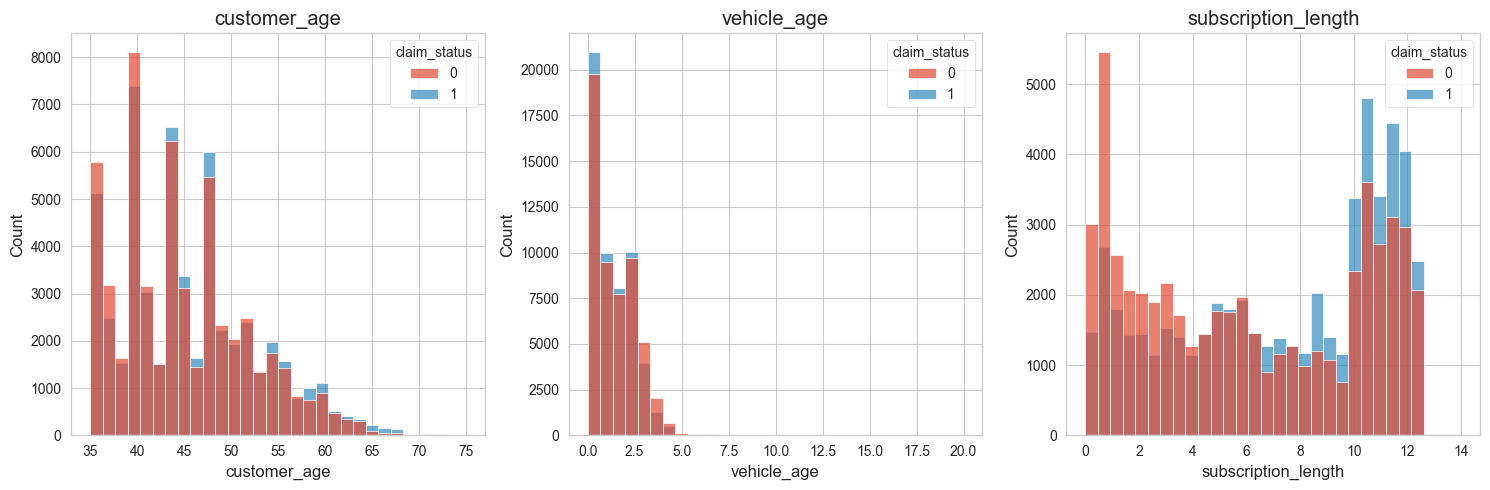

In [22]:
columns = ['customer_age', 'vehicle_age', 'subscription_length']

plt.figure( figsize = (15,5))

for index, i in enumerate(columns, 1):
    plt.subplot(1,3, index)
    sns.histplot( data = oversampled_data , x = i, hue = "claim_status", bins = 30 ,alpha = 0.7)
    plt.title(i)

plt.tight_layout()
plt.show()

### Feature Selection
Now, we will identify the most important variables for predicting insurance frequency claims. It involves analyzing both categorical and numerical features to determine their impact on the target variable. We will use feature importance techniques suitable for both types of variables. Let’s start with feature selection to identify the most important variables

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [25]:
# encode categorical variables

le = LabelEncoder()
encoded_data = df.apply( lambda col : le.fit_transform(col) if col.dtype == "object" else col )

# separate features and target variable
x = encoded_data.drop(columns = "claim_status", axis = 1)
y = encoded_data["claim_status"]

# create a random forest classifier model
rf_model = RandomForestClassifier()

rf_model.fit(x,y)

# get feature importance
feature_importance = rf_model.feature_importances_

feature_importance

array([3.21786669e-01, 2.45654345e-01, 1.34409405e-01, 1.76626722e-01,
       5.50226147e-02, 5.56340007e-02, 6.65643742e-04, 8.86120523e-04,
       3.03352435e-04, 4.97437162e-04, 4.21772207e-04, 6.93117823e-04,
       2.17603505e-04, 2.35770649e-04, 1.51167675e-04, 9.38379949e-05,
       5.47670817e-05, 2.59306093e-04, 1.13498598e-04, 5.20769574e-04,
       2.77273766e-04, 2.39785595e-04, 2.14460425e-04, 6.59476616e-04,
       8.18772329e-04, 6.89282202e-04, 6.20954724e-04, 1.80066014e-04,
       1.61524326e-04, 1.84362460e-04, 2.02415940e-04, 1.68738304e-04,
       1.09867290e-04, 1.75281034e-04, 3.13926886e-05, 1.47504683e-04,
       2.02942017e-04, 9.94772622e-05, 5.07631242e-05, 5.17738979e-04])

In [26]:
features_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
features_df = features_df.sort_values( by = "Importance", ascending = False)
features_df.head(10)

,Feature,Importance
0,policy_id,0.321787
1,subscription_length,0.245654
3,customer_age,0.176627
2,vehicle_age,0.134409
5,region_density,0.055634
4,region_code,0.055023
7,model,0.000886
24,length,0.000819
11,engine_type,0.000693
25,width,0.000689


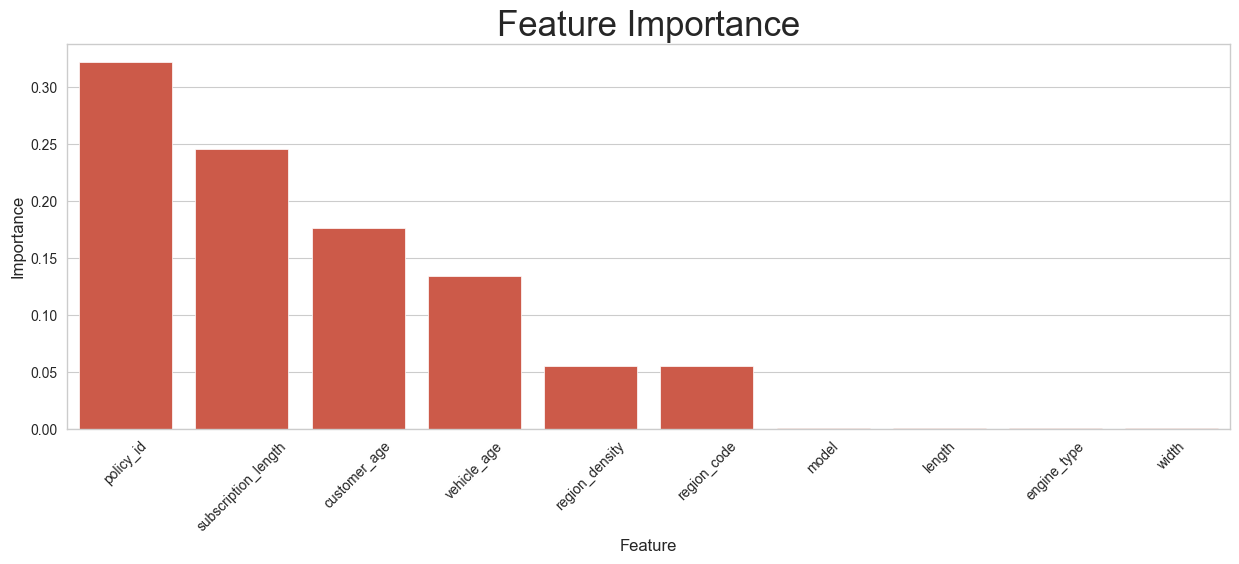

In [27]:
plt.figure( figsize = (15,5))

sns.barplot( data = features_df.head(10) , x = "Feature" , y = "Importance")

plt.title( "Feature Importance", size = 25)
plt.xticks(rotation = 45)
plt.show()

### The top 10 most important variables for predicting insurance frequency claims, according to the Random Forest model, are:

1) policy_id: Unique identifier for the insurance policy
2) subscription_length: Length of the insurance subscription
3) customer_age: Age of the customer
4) vehicle_age: Age of the vehicle
5) region_density: Population density of the region
6) region_code: Code representing the region
7) model: Model of the vehicle
8) engine_type: Type of engine in the vehicle
9) gross_weight: Gross weight of the vehicle
10) length: Length of the vehicle

**These variables appear to have the most influence on the likelihood of an insurance claim being made. However, it’s notable that policy_id has a very high importance, which might not be intuitively relevant for prediction. So, we need to make sure to drop the policy_id column while model training.**

# Model Training

The next step is to build a predictive model using the oversampled data. Given the nature of the task (binary classification), a suitable algorithm could be logistic regression, random forest, or gradient boosting. Considering the effectiveness of random forests in handling both numerical and categorical data and their ability to model complex interactions, we’ll proceed with a Random Forest classifier:

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

### Random Forest

In [29]:
# drop 'Policy_id' column from the data
oversampled_data = oversampled_data.drop('policy_id', axis=1)

# prepare the oversampled data
x_oversampled = oversampled_data[["subscription_length" , "customer_age", "vehicle_age", "region_density", "region_code"]]

y_oversampled = oversampled_data['claim_status']

# encoding categorical columns
x_oversampled_encoded = x_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)


In [30]:
rf_params = { 
                'n_estimators': [50, 100], 
                'max_depth': [None, 10, 20], 
                'min_samples_split': [2, 5], 
                'min_samples_leaf': [1, 2], 
                'criterion': ['gini', 'entropy']
             }

# Random Forest model
rf_model_oversampled =  GridSearchCV(  
                                      RandomForestClassifier(random_state=42), 
                                      param_grid = rf_params, 
                                      cv = 3, 
                                      scoring="accuracy", 
                                      n_jobs=-1
                                    )

rf_model_oversampled.fit(x_train, y_train)

rf_model_oversampled_best = rf_model_oversampled.best_estimator_

# predictions
y_pred_rf = rf_model_oversampled_best.predict(x_test)

rf_train_cr = classification_report(y_train, rf_model_oversampled_best.predict(x_train))
rf_test_cr = classification_report(y_test, y_pred_rf)

In [31]:
print("Train Classification Report Of Random Forest :-")
print("\n",rf_train_cr)
print("\n Test Classification Report Of Random Forest :-")
print("\n",rf_test_cr)

Train Classification Report Of Random Forest :-

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     38270
           1       0.98      1.00      0.99     38511

    accuracy                           0.99     76781
   macro avg       0.99      0.99      0.99     76781
weighted avg       0.99      0.99      0.99     76781


 Test Classification Report Of Random Forest :-

               precision    recall  f1-score   support

           0       1.00      0.94      0.97     16574
           1       0.95      1.00      0.97     16333

    accuracy                           0.97     32907
   macro avg       0.97      0.97      0.97     32907
weighted avg       0.97      0.97      0.97     32907



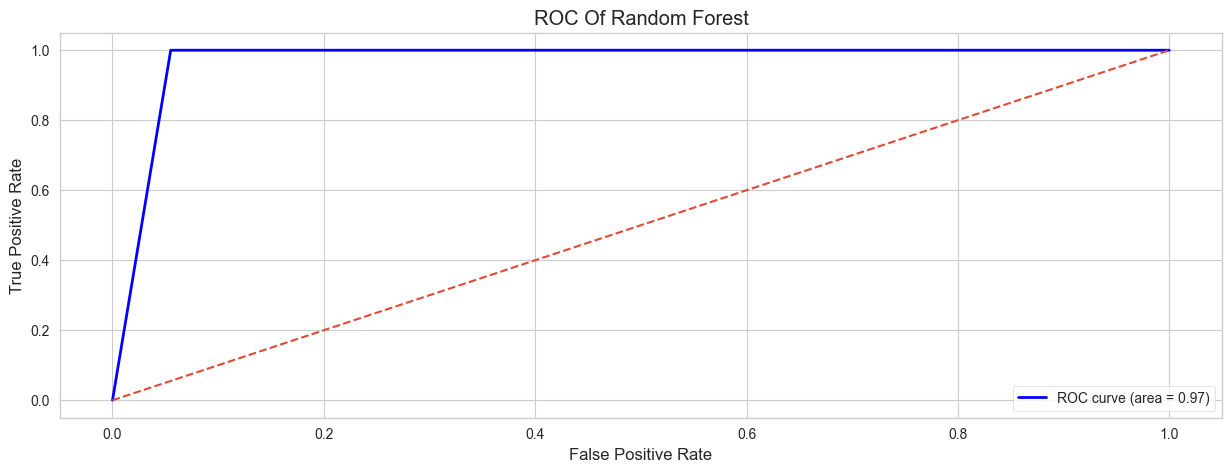

In [32]:
# AUC-ROC curve 
fpr, tpr, _ = roc_curve(y_test, y_pred_rf) 
roc_auc = auc(fpr, tpr)

plt.figure( figsize = (15,5)) 
plt.plot(fpr, tpr, color='blue', lw=2 , label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot( [0,1], [0,1] , linestyle = "--")
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Of Random Forest') 
plt.legend(loc="lower right") 
plt.show()

# Decision Tree 

In [33]:
dt_params =  parameter = {  'criterion' : ['gini','entropy','log_loss'],
                            'splitter' : ['best','random'],
                            'max_depth' : [1,2,3,4,5,6],
                            'max_features':['auto','sqrt','log2']
                         }

dt_model_oversampled = GridSearchCV(  
                                      DecisionTreeClassifier(random_state=42), 
                                      param_grid = dt_params, 
                                      cv = 3, 
                                      scoring="accuracy", 
                                      n_jobs=-1
                                    )

dt_model_oversampled.fit(x_train, y_train)

dt_model_oversampled_best = dt_model_oversampled.best_estimator_

# predictions
y_pred_dt = rf_model_oversampled_best.predict(x_test)

dt_train_cr = classification_report(y_train, dt_model_oversampled_best.predict(x_train))
dt_test_cr = classification_report(y_test, y_pred_dt)

In [34]:
print("Train Classification Report Of Decision Tree :-")
print("\n",dt_train_cr)
print("\nTest Classification Report Of Decision Tree:-")
print("\n",dt_test_cr)

Train Classification Report Of Decision Tree :-

               precision    recall  f1-score   support

           0       0.65      0.48      0.55     38270
           1       0.59      0.74      0.66     38511

    accuracy                           0.61     76781
   macro avg       0.62      0.61      0.60     76781
weighted avg       0.62      0.61      0.60     76781


Test Classification Report Of Decision Tree:-

               precision    recall  f1-score   support

           0       1.00      0.94      0.97     16574
           1       0.95      1.00      0.97     16333

    accuracy                           0.97     32907
   macro avg       0.97      0.97      0.97     32907
weighted avg       0.97      0.97      0.97     32907



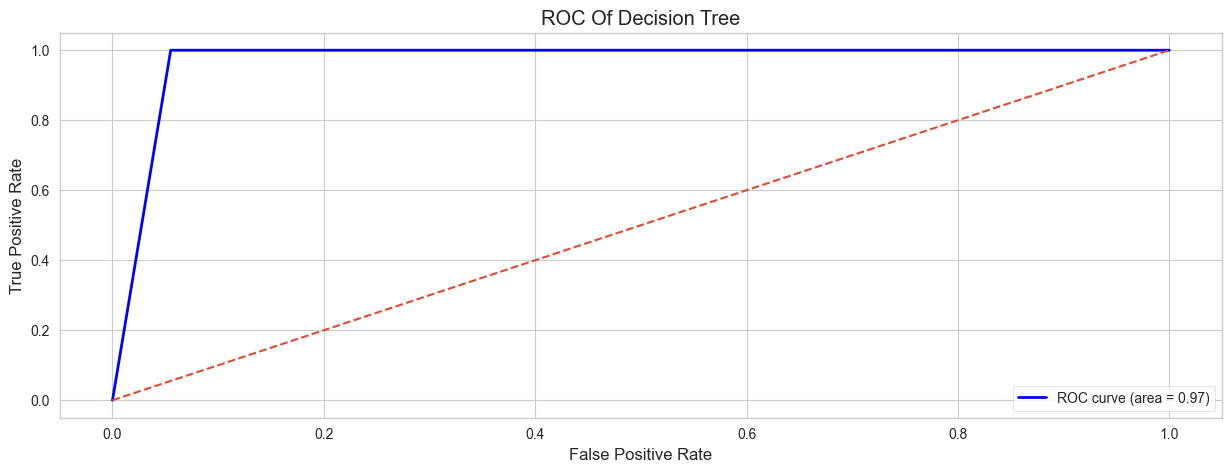

In [35]:
# AUC-ROC curve 
fpr, tpr, _ = roc_curve(y_test, y_pred_dt) 
roc_auc = auc(fpr, tpr)

plt.figure( figsize = (15,5)) 
plt.plot(fpr, tpr, color='blue', lw=2 , label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot( [0,1], [0,1] , linestyle = "--")
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Of Decision Tree') 
plt.legend(loc="lower right") 
plt.show()

# XGBClassifier

In [36]:
xgb_params = { 
                'n_estimators': [50, 100], 
                 'max_depth': [3, 5, 7], 
                'learning_rate': [0.01, 0.1] 
             } 

xgb_model_oversampled = GridSearchCV( 
                                     estimator=XGBClassifier(random_state=42), 
                                     param_grid=xgb_params,
                                     scoring='accuracy', 
                                     cv=5, 
                                     n_jobs=-1 
                                    )

xgb_model_oversampled.fit(x_train, y_train) 

xgb_model_oversampled_best = xgb_model_oversampled.best_estimator_

# predictions
y_pred_xgb = xgb_model_oversampled_best.predict(x_test)

xgb_train_cr = classification_report(y_train, xgb_model_oversampled_best.predict(x_train))
xgb_test_cr = classification_report(y_test, y_pred_xgb)

In [37]:
print("Train Classification Report Of XGB :-")
print("\n",xgb_train_cr)
print("\nTest Classification Report Of XGB :-")
print("\n",xgb_test_cr)

Train Classification Report Of XGB :-

               precision    recall  f1-score   support

           0       0.78      0.62      0.69     38270
           1       0.69      0.83      0.75     38511

    accuracy                           0.72     76781
   macro avg       0.73      0.72      0.72     76781
weighted avg       0.73      0.72      0.72     76781


Test Classification Report Of XGB :-

               precision    recall  f1-score   support

           0       0.77      0.60      0.67     16574
           1       0.67      0.82      0.73     16333

    accuracy                           0.70     32907
   macro avg       0.72      0.71      0.70     32907
weighted avg       0.72      0.70      0.70     32907



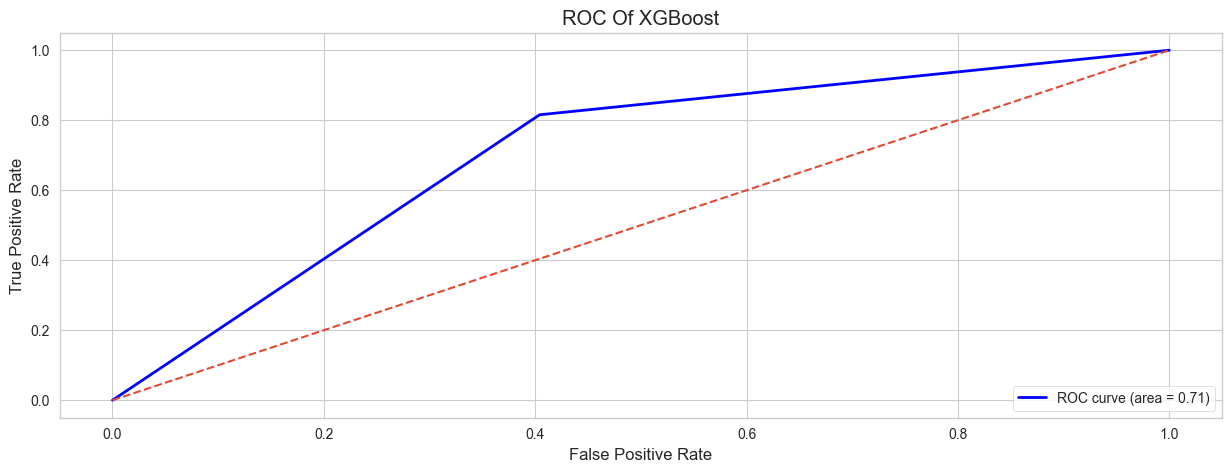

In [38]:
# AUC-ROC curve 
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb) 
roc_auc = auc(fpr, tpr)

plt.figure( figsize = (15,5)) 
plt.plot(fpr, tpr, color='blue', lw=2 , label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot( [0,1], [0,1] , linestyle = "--")
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Of XGBoost') 
plt.legend(loc="lower right") 
plt.show()

### Best Perfomance By Random Forest Classifier

In [39]:
# Classification Report Of Random Forest 
print("Train Classification Report Of Random Forest :-")
print("\n",rf_train_cr)
print("\n Classification Report Of Random Forest")
print("\n",rf_test_cr)

Train Classification Report Of Random Forest :-

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     38270
           1       0.98      1.00      0.99     38511

    accuracy                           0.99     76781
   macro avg       0.99      0.99      0.99     76781
weighted avg       0.99      0.99      0.99     76781


 Classification Report Of Random Forest

               precision    recall  f1-score   support

           0       1.00      0.94      0.97     16574
           1       0.95      1.00      0.97     16333

    accuracy                           0.97     32907
   macro avg       0.97      0.97      0.97     32907
weighted avg       0.97      0.97      0.97     32907



The classification report above provides various metrics to evaluate the performance of the predictive model on the test data. Here’s an interpretation of the results:

#### Random Forest:

- **Train Performance:** Extremely high metrics across the board (precision, recall, f1-score = 0.99), indicating very strong performance and near-perfect predictions.

- **Test Performance:** Slight drop in recall for class 0 (0.94), but overall, the performance is still very high with accuracy and f1-score = 0.97. This suggests the model generalizes well with only slight overfitting.

- **Conclusion:** Random Forest shows robust and consistent performance for both training and test datasets, making it the strongest candidate for the problem.

#### Now, let’s label the original imbalanced data using our model to see how many instances are correctly classified from our model:-

In [40]:
original_encoded = df[['subscription_length', 'customer_age', 'vehicle_age', 'region_density', 'region_code', 'claim_status']].copy()
encoders = {col: LabelEncoder().fit(x_oversampled[col]) for col in x_oversampled.select_dtypes(include=['object']).columns}

for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_model_oversampled_best.predict(original_encoded.drop('claim_status', axis=1))

comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

comparison_df.head(10)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [41]:
print(classification_report(original_encoded["claim_status"], original_encoded_predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     54844
           1       0.71      1.00      0.83      3748

    accuracy                           0.97     58592
   macro avg       0.86      0.99      0.91     58592
weighted avg       0.98      0.97      0.98     58592



**Overall Metrics:**

- Accuracy: 0.97
  The model correctly predicts 97% of all cases in the dataset.
- Macro Average:
  Precision: 0.86
  Average precision across both classes. Lowered due to Class 1's precision.
- Recall: 0.99
  High recall as both classes have strong recall values.
- F1-Score: 0.91
  Balanced performance across both classes.
- Weighted Average:
  Weighted by class support, these averages reflect the dominance of Class 0 in the dataset
**Precision: 0.99**,
**Recall: 0.97**,
**F1-Score: 0.98**.

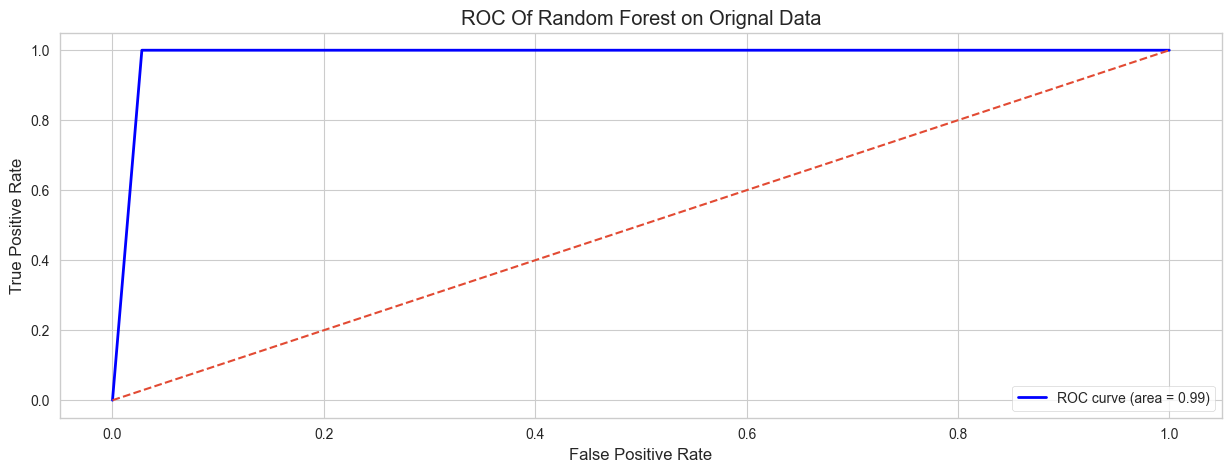

In [42]:
# AUC-ROC curve 
fpr, tpr, _ = roc_curve(original_encoded["claim_status"], original_encoded_predictions) 
roc_auc = auc(fpr, tpr)

plt.figure( figsize = (15,5)) 
plt.plot(fpr, tpr, color='blue', lw=2 , label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot( [0,1], [0,1] , linestyle = "--")
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Of Random Forest on Orignal Data') 
plt.legend(loc="lower right") 
plt.show()

### Let’s visualize the percentage of correctly classified and misclassified samples:

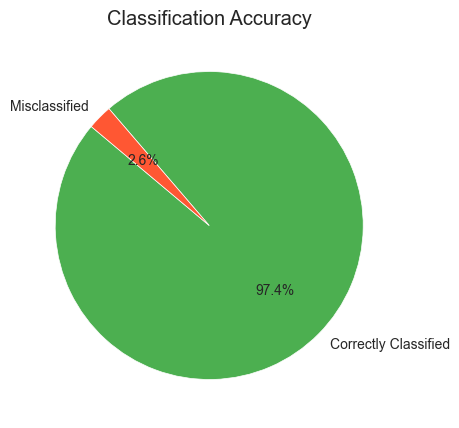

In [43]:
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']

# create a pie chart
plt.figure(figsize=(10, 5))
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5733'])
plt.title('Classification Accuracy')
plt.show()

### So, we can see that our model performs well on the original imbalanced data as well.

### Summary

So, this is how we handle class imbalance and perform classification on imbalanced data. Imbalanced data refers to a situation in classification problems where the number of observations in each class significantly differs. In such datasets, one class (the majority class) vastly outnumbers the other class (the minority class). This imbalance can lead to biased models that favour the majority class, resulting in poor predictive performance on the minority class, which is often the class of greater interest.

### Conclusion

- The Random Forest model successfully predicted insurance claims with 97% accuracy on imbalanced data, achieving excellent recall (1.00) for claims.
- Despite the strong performance, precision for claims (class 1) was lower (0.71), indicating some false positives. 
- By applying oversampling to balance the data, the model showed near-perfect results on the training data, proving its potential for future improvements. 

# Storing The Best Model in Pickle For Web App Using Streamlit

In [44]:
import pickle 

In [45]:
with open("rf_best_model.pkl","wb") as file:
    pickle.dump(rf_model_oversampled_best, file)